In [1]:
# Modules will be reloaded every time a cell is executed
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from Bio.Seq import Seq

# from utils.data_processing import parse_biomart_fasta

from funmirtar.utils.data_processing import parse_UCSC_utr_txt


In [3]:
# IN_UTR_SEQ_TXT_PATH = 'data/3utr/3utr.sequences.txt'

# IN_UTR_SEQ_TXT_PATH = 'data/GRCh37.p13 hg19/utr_sequences_hg19.txt'
# IN_UTR_SEQ_TXT_PATH = 'data/GRCh37.p13 hg19/ensembl/utr_sequences_hg19_grch37.txt'
IN_UTR_SEQ_TXT_PATH = '../../data/GRCh37.p13 hg19/UCSC/3utr_sequences.txt'
# IN_UTR_SEQ_TXT_PATH = 'data/GRCh37.p13 hg19/targetscan/UTR_Sequences.txt'
MIRNA_FCS = '../../data/fold_change/mirna_fcs.csv'
TS_GENE_INFO = '../../data/target_scan_8/Gene_info.txt'
ID_MAP = '../../data/GRCh37.p13 hg19/UCSC/id_map'

OUT_UTR_DF_MIRNA_FC_PATH = '../../data/processed/GRCh37.p13 hg19/3utr.sequences.refseq_id.mirna_fc.pkl'
# OUT_UTR_DF_MIRNA_FC_PATH = 'data/processed/GRCh37.p13 hg19/UCSC/3utr.sequences.refseq_id.mirna_fc.pkl'

In [4]:
SEQUENCE_UNAVAILABLE = Seq("Sequenceunavailable")

In [6]:

utrs_df = parse_UCSC_utr_txt(IN_UTR_SEQ_TXT_PATH)


In [7]:
utrs_df.shape

(140316, 8)

In [8]:
utrs_df[utrs_df.Sequence.map(lambda seq: not isinstance(len(seq), int))]

,ID,Name,Description,Sequence,Chromosome,Start,End,Strand


In [9]:
utrs_df[utrs_df.Sequence.map(len) < 1]

,ID,Name,Description,Sequence,Chromosome,Start,End,Strand


In [10]:
utrs_df = utrs_df.rename({'Sequence': 'sequence', 'ID':'ID_versioned'}, axis='columns')

In [11]:
utrs_df['RefSeq ID'] = utrs_df.ID_versioned.map(lambda ID: ID.split('.')[0])

In [12]:
# utrs = parse_biomart_fasta(IN_UTR_SEQ_TXT_PATH)

In [13]:
# utrs_df = pd.DataFrame(utrs)
utrs_with_seq = utrs_df[utrs_df.sequence != SEQUENCE_UNAVAILABLE]

In [14]:
utrs_with_seq.shape

(140316, 9)

In [15]:
mirna_fc = pd.read_csv(MIRNA_FCS)
mirna_fc['RefSeq ID'].nunique()

8372

In [16]:
ucsc_id_map = pd.read_csv(ID_MAP, comment='#', header=None, names=[
    "knownGene.name",
    "knownGene.chrom",
    "kgAlias.kgID",
    "kgAlias.alias",
    "kgXref.kgID",
    "kgXref.mRNA",
    "kgXref.geneSymbol",
    "kgXref.refseq",
    "knownToEnsembl.name",
    "knownToEnsembl.value",
    "knownToRefSeq.name",
    "knownToRefSeq.value"
], delimiter='\t')

In [17]:
ucsc_id_map

,knownGene.name,knownGene.chrom,kgAlias.kgID,kgAlias.alias,kgXref.kgID,kgXref.mRNA,kgXref.geneSymbol,kgXref.refseq,knownToEnsembl.name,knownToEnsembl.value,knownToRefSeq.name,knownToRefSeq.value
0,uc001aaa.3,chr1,uc001aaa.3,"DDX11L1,NR_046018,uc001aaa.3",uc001aaa.3,NR_046018,DDX11L1,NaN,uc001aaa.3,ENST00000456328,uc001aaa.3,NR_046018
1,uc010nxr.1,chr1,uc010nxr.1,"AM992878,DDX11L1,uc010nxr.1",uc010nxr.1,AM992878,DDX11L1,NaN,uc010nxr.1,ENST00000456328,uc010nxr.1,NR_046018
2,uc010nxq.1,chr1,uc010nxq.1,"AM992880,B7ZGX9,B7ZGX9_HUMAN,DDX11L1,DDX11L9,u...",uc010nxq.1,AM992880,DDX11L1,NaN,uc010nxq.1,ENST00000518655,uc010nxq.1,NR_046018
3,uc009vis.3,chr1,uc009vis.3,"BC047449,WASH7P,uc009vis.3",uc009vis.3,BC047449,WASH7P,NaN,uc009vis.3,ENST00000423562,uc009vis.3,NR_024540
4,uc009vjc.1,chr1,uc009vjc.1,"AK291582,WASH7P,uc009vjc.1",uc009vjc.1,AK291582,WASH7P,NaN,uc009vjc.1,ENST00000541675,uc009vjc.1,NR_024540
...,...,...,...,...,...,...,...,...,...,...,...,...
82955,uc002qun.2,chr19_gl000209_random,uc002qun.2,"AJ002104,CD158J,KI2S2_HUMAN,KIR2DS2,NKAT5,NM_0...",uc002qun.2,AJ002104,KIR2DS2,NM_012312,NaN,NaN,uc002qun.2,NM_012312
82956,uc010evk.1,chr19_gl000209_random,uc010evk.1,"KIR2DS2,L76668,Q14950,Q14950_HUMAN,uc010evk.1",uc010evk.1,L76668,KIR2DS2,NaN,NaN,NaN,uc010evk.1,NM_012312
82957,uc010evl.1,chr19_gl000209_random,uc010evl.1,"AF074087,KIR2DS2,O75579,O75579_HUMAN,uc010evl.1",uc010evl.1,AF074087,KIR2DS2,NaN,NaN,NaN,uc010evl.1,NM_012312
82958,uc002quo.2,chr19_gl000209_random,uc002quo.2,"CD158J,KI2S2_HUMAN,KIR2DS2,NKAT5,NM_012312,NP_...",uc002quo.2,NM_012312,KIR2DS2,NM_012312,NaN,NaN,uc002quo.2,NM_012312


In [18]:
# utrs_with_seq

In [19]:
ucsc_id_map['RefSeq ID'] = ucsc_id_map['knownToRefSeq.value'].fillna(
    ucsc_id_map['kgXref.refseq']
)

In [20]:
# ucsc_id_map = 
ucsc_id_map[
    [
        'knownGene.chrom',
        'knownToEnsembl.value',
        'RefSeq ID',
        'kgXref.geneSymbol',
    ]
]

,knownGene.chrom,knownToEnsembl.value,RefSeq ID,kgXref.geneSymbol
0,chr1,ENST00000456328,NR_046018,DDX11L1
1,chr1,ENST00000456328,NR_046018,DDX11L1
2,chr1,ENST00000518655,NR_046018,DDX11L1
3,chr1,ENST00000423562,NR_024540,WASH7P
4,chr1,ENST00000541675,NR_024540,WASH7P
...,...,...,...,...
82955,chr19_gl000209_random,NaN,NM_012312,KIR2DS2
82956,chr19_gl000209_random,NaN,NM_012312,KIR2DS2
82957,chr19_gl000209_random,NaN,NM_012312,KIR2DS2
82958,chr19_gl000209_random,NaN,NM_012312,KIR2DS2


In [21]:
ucsc_id_map.drop_duplicates(inplace=True)
ucsc_id_map.shape

(82960, 13)

In [22]:
mirnas = ['hsa-miR-16-5p', 'hsa-miR-106b-5p',
       'hsa-miR-200a-3p', 'hsa-miR-200b-3p', 'hsa-miR-215-5p', 'hsa-let-7c-5p',
       'hsa-miR-103a-3p']

In [23]:
ts_gene_info = pd.read_csv(TS_GENE_INFO, sep='\t')

In [24]:
ts_gene_info = ts_gene_info[['Transcript ID', 'Representative transcript?']]

In [25]:
mirna_fc_ucsc_id = pd.merge(
    mirna_fc,
    ucsc_id_map,
    left_on='RefSeq ID',
    right_on='RefSeq ID',
    how='left',
)
mirna_fc_ucsc_id = mirna_fc_ucsc_id.drop_duplicates()

print(mirna_fc['RefSeq ID'].nunique(), mirna_fc_ucsc_id['RefSeq ID'].nunique(), mirna_fc_ucsc_id.shape)

8372 8372 (18360, 21)


### Join UTR sequences mirna_fc_ucsc_id FC with RefSeq and Ensemble IDs

In [26]:
utrs_with_seq.head(3)

,ID_versioned,Name,Description,sequence,Chromosome,Start,End,Strand,RefSeq ID
0,NM_001376549.1,hg19_ncbiRefSeq_NM_001376549.1,hg19_ncbiRefSeq_NM_001376549.1 range=chr1:6720...,TGAAATCTTATGCAAGGATTTGGAGGATTCATATAATGGAGAACTG...,chr1,67208779,67216822,+,NM_001376549
1,NM_001376535.1,hg19_ncbiRefSeq_NM_001376535.1,hg19_ncbiRefSeq_NM_001376535.1 range=chr1:6720...,TGAAATCTTATGCAAGGATTTGGAGGATTCATATAATGGAGAACTG...,chr1,67208779,67216822,+,NM_001376535
2,NM_001376554.1,hg19_ncbiRefSeq_NM_001376554.1,hg19_ncbiRefSeq_NM_001376554.1 range=chr1:6720...,TGAAATCTTATGCAAGGATTTGGAGGATTCATATAATGGAGAACTG...,chr1,67208779,67216822,+,NM_001376554


In [27]:
mirna_fc_ucsc_id.head(3)

,RefSeq ID,Gene symbol,hsa-miR-16-5p,hsa-miR-106b-5p,hsa-miR-200a-3p,hsa-miR-200b-3p,hsa-miR-215-5p,hsa-let-7c-5p,hsa-miR-103a-3p,knownGene.name,...,kgAlias.kgID,kgAlias.alias,kgXref.kgID,kgXref.mRNA,kgXref.geneSymbol,kgXref.refseq,knownToEnsembl.name,knownToEnsembl.value,knownToRefSeq.name,knownToRefSeq.value
0,NM_000017,ACADS,-0.035,0.068,-0.047,0.048,-0.225,0.250,0.094,uc010szl.1,...,uc010szl.1,"ACADS,AK300645,E9PE82,E9PE82_HUMAN,NM_000017,N...",uc010szl.1,AK300645,ACADS,NM_000017,uc010szl.1,ENST00000411593,uc010szl.1,NM_000017
1,NM_000017,ACADS,-0.035,0.068,-0.047,0.048,-0.225,0.250,0.094,uc001tza.4,...,uc001tza.4,"ACADS,ACADS_HUMAN,NM_000017,NP_000008,P16219,P...",uc001tza.4,NM_000017,ACADS,NM_000017,uc001tza.4,ENST00000242592,uc001tza.4,NM_000017
2,NM_000019,ACAT1,0.243,-0.201,0.268,-0.014,-0.013,-0.176,-0.071,uc001pjw.1,...,uc001pjw.1,"ACAT1,BC010942,G3XAB4,G3XAB4_HUMAN,NM_000019,N...",uc001pjw.1,BC010942,ACAT1,NM_000019,uc001pjw.1,ENST00000299355,uc001pjw.1,NM_000019


In [28]:
mirna_fc_ucsc_id_seq = pd.merge(
    mirna_fc_ucsc_id,
    utrs_with_seq,
    left_on='RefSeq ID',
    # right_on='ensembl_transcript_id',
    right_on='RefSeq ID',
    how='left',
)
# mirna_fc_ucsc_id_seq = mirna_fc_ucsc_id_seq.drop(columns=['ensembl_transcript_id'])
print(mirna_fc_ucsc_id_seq['RefSeq ID'].nunique())

8372


In [29]:
mirna_fc_ucsc_id_seq.sequence.map(lambda seq: not isinstance(seq, str)).sum()

266

In [30]:
# mirna_fc_ucsc_id_seq[mirna_fc_ucsc_id_seq.sequence.map(lambda seq: not isinstance(seq, str))]
mirna_fc_ucsc_id_seq[mirna_fc_ucsc_id_seq.sequence.isnull()]

,RefSeq ID,Gene symbol,hsa-miR-16-5p,hsa-miR-106b-5p,hsa-miR-200a-3p,hsa-miR-200b-3p,hsa-miR-215-5p,hsa-let-7c-5p,hsa-miR-103a-3p,knownGene.name,...,knownToRefSeq.name,knownToRefSeq.value,ID_versioned,Name,Description,sequence,Chromosome,Start,End,Strand
35,NM_000060,BTD,0.007,-0.081,-0.135,0.081,-0.055,0.094,0.004,uc011avv.2,...,uc011avv.2,NM_000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NM_000060,BTD,0.007,-0.081,-0.135,0.081,-0.055,0.094,0.004,uc003cah.3,...,uc003cah.3,NM_000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NM_000060,BTD,0.007,-0.081,-0.135,0.081,-0.055,0.094,0.004,uc011avw.2,...,uc011avw.2,NM_000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NM_000060,BTD,0.007,-0.081,-0.135,0.081,-0.055,0.094,0.004,uc011avx.2,...,uc011avx.2,NM_000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NM_000347,SPTB,-0.135,0.124,0.113,0.044,-0.149,0.006,NaN,uc001xht.3,...,uc001xht.3,NM_000347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20491,NM_203404,AMPD2,0.352,-0.339,-0.404,-0.105,0.209,-0.067,-0.112,uc001dyd.1,...,uc001dyd.1,NM_203404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20507,NM_203476,PORCN,0.182,0.059,-0.064,0.046,0.360,-0.224,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20508,NM_203488,ACYP1,0.038,-0.122,-0.085,0.242,-0.023,0.016,-0.064,uc001xrf.3,...,uc001xrf.3,NM_203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,NM_207112,HAGHL,0.044,-0.105,0.010,-0.241,-0.102,0.162,0.282,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ts_gene_info['ensembl_id_no_version'] = ts_gene_info['Transcript ID'].map(lambda ID: ID.split('.')[0])

In [32]:
# we get the Representative transcript? field from TargetScan
mirna_fc_ucsc_id_seq_repre = pd.merge(
    mirna_fc_ucsc_id_seq,
    ts_gene_info,
    # left_on = 'ensembl_transcript_id_version',
    left_on = 'knownToEnsembl.value',
    right_on = 'ensembl_id_no_version',
    how = 'left',
)
print(mirna_fc_ucsc_id_seq_repre['RefSeq ID'].nunique())

8372


In [33]:
mirna_fc_ucsc_id_seq_repre.shape

(20608, 32)

In [34]:
# mirna_fc_ucsc_id_seq_repre[mirna_fc_ucsc_id_seq_repre['Transcript ID'].isnull()]
mirna_fc_ucsc_id_seq_repre['Transcript ID'].isnull().sum()

7899

In [35]:
print(ts_gene_info['ensembl_id_no_version'].nunique())
ts_gene_info = pd.merge(
    ts_gene_info,
    ucsc_id_map,
    left_on = 'ensembl_id_no_version',
    right_on = 'knownToEnsembl.value',
    how = 'left',
)
print(ts_gene_info['ensembl_id_no_version'].nunique())

28352
28352


In [36]:
utrs_with_seq_repre = pd.merge(
    utrs_with_seq,
    ts_gene_info,
    # left_on = 'ensembl_transcript_id_version',
    left_on = 'RefSeq ID',
    # right_on = 'ensembl_id_no_version',
    right_on = 'RefSeq ID',
    how = 'left',
)
print(mirna_fc_ucsc_id_seq_repre['RefSeq ID'].nunique())

8372


In [37]:
utrs_with_seq_repre['Transcript ID'].isnull().sum()

107835

### Keep representative/longest_UTR per RefSeq ID

In [38]:
mirna_fc_ucsc_id_seq_repre["sequence_origin"] = None

In [39]:
# mirna_fc_ucsc_id_seq_repre[['RefSeq ID', 'Gene symbol','knownGene.chrom', 'knownToEnsembl.value',
#        'kgXref.geneSymbol', 'ID_versioned', 'Name', 'Description', 'sequence',
#        'Chromosome', 'Start', 'End', 'Strand', 'Transcript ID',
#        'Representative transcript?', 'ensembl_id_no_version',
#        'sequence_origin']]

In [40]:
utrs_with_seq_repre['Transcript ID'].isna().sum() #ensembl_id_no_version

107835

In [41]:
utrs_with_seq_repre[utrs_with_seq_repre['kgXref.geneSymbol'].notna()][['knownGene.name',
       'knownGene.chrom', 'kgAlias.kgID', 'kgAlias.alias', 'kgXref.kgID',
       'kgXref.mRNA', 'kgXref.geneSymbol', 'kgXref.refseq',
       'knownToEnsembl.name', 'knownToEnsembl.value', 'knownToRefSeq.name',
       'knownToRefSeq.value']]#.columns
#kgXref.geneSymbol

,knownGene.name,knownGene.chrom,kgAlias.kgID,kgAlias.alias,kgXref.kgID,kgXref.mRNA,kgXref.geneSymbol,kgXref.refseq,knownToEnsembl.name,knownToEnsembl.value,knownToRefSeq.name,knownToRefSeq.value
33,uc010ocd.2,chr1,uc010ocd.2,"NECAP2,NM_001145278,NP_001138750,Q9NVZ3-4,uc01...",uc010ocd.2,NM_001145278,NECAP2,NM_001145278,uc010ocd.2,ENST00000337132,uc010ocd.2,NM_001145278
34,uc021ogo.1,chr1,uc021ogo.1,"AK300764,NECAP2,uc021ogo.1",uc021ogo.1,AK300764,NECAP2,NaN,uc021ogo.1,ENST00000337132,uc021ogo.1,NM_001145278
35,uc001ayq.3,chr1,uc001ayq.3,"NECAP2,NM_001145277,NP_001138749,Q9NVZ3-2,uc00...",uc001ayq.3,NM_001145277,NECAP2,NM_001145277,uc001ayq.3,ENST00000337132,uc001ayq.3,NM_001145277
36,uc001ayo.3,chr1,uc001ayo.3,"B4DY19,E9PGQ8,NECAP2,NECP2_HUMAN,NM_018090,NP_...",uc001ayo.3,NM_018090,NECAP2,NM_018090,uc001ayo.3,ENST00000337132,uc001ayo.3,NM_018090
37,uc001bjo.2,chr1,uc001bjo.2,"CLIC4,CLIC4_HUMAN,NM_013943,NP_039234,Q9UFW9,Q...",uc001bjo.2,NM_013943,CLIC4,NM_013943,uc001bjo.2,ENST00000374379,uc001bjo.2,NM_013943
...,...,...,...,...,...,...,...,...,...,...,...,...
154820,uc031poi.1,chr1,uc031poi.1,"H0Y8D2,H0Y8D2_HUMAN,NBPF12,NM_001278141,NP_001...",uc031poi.1,NM_001278141,NBPF12,NM_001278141,uc031poi.1,ENST00000442909,uc031poi.1,NM_001278141
154821,uc010ozk.2,chr1,uc010ozk.2,"AB033071,H0Y8D2,H0Y8D2_HUMAN,NBPF12,uc010ozk.1...",uc010ozk.2,AB033071,NBPF12,NaN,uc010ozk.2,ENST00000442909,uc010ozk.2,NM_001278141
154822,uc031poi.1,chr1,uc031poi.1,"H0Y8D2,H0Y8D2_HUMAN,NBPF12,NM_001278141,NP_001...",uc031poi.1,NM_001278141,NBPF12,NM_001278141,uc031poi.1,ENST00000442909,uc031poi.1,NM_001278141
154823,uc010ozk.2,chr1,uc010ozk.2,"AB033071,H0Y8D2,H0Y8D2_HUMAN,NBPF12,uc010ozk.1...",uc010ozk.2,AB033071,NBPF12,NaN,uc010ozk.2,ENST00000442909,uc010ozk.2,NM_001278141


In [42]:
# mirna_fc_ucsc_id_seq_repre['transcript_length'] = mirna_fc_ucsc_id_seq_repre.apply(lambda a: int(abs(a['End'] - a['Start'])) if not pd.isna(a['Start']) else 0, axis=1)
mirna_fc_ucsc_id_seq_repre['utr3_length'] = mirna_fc_ucsc_id_seq_repre.apply(lambda a: len(a['sequence']) if not pd.isna(a['sequence']) else 0, axis=1)

In [43]:
def get_seq_len(a):
    if a is None or a == '' or pd.isna(a):
        return 0
    else:
        return len(a)
    
def has_sequence(index, df):
    return pd.notnull(index) and get_seq_len(df.iloc[index].sequence) > 0

utrs_longest_seq = []
refseq_id_not_resolved = []

groupby_refseq = mirna_fc_ucsc_id_seq_repre.groupby("RefSeq ID")
# external_gene_name
groupby_gene = utrs_with_seq_repre.groupby('kgXref.geneSymbol')
# ensembl_transcript_id_version
groupby_ensembl_id = utrs_with_seq_repre.groupby('Transcript ID')
# also prefer rows with sequences 

for group_name, group in groupby_refseq:
    repre_index_per_gene = None
    longest_utr_index_per_gene = None
    repre_index_per_ensembl_id = None
    longest_utr_index_per_ensembl_id = None
    
    repre_transcript_index = group['Representative transcript?'].idxmax()
    longest_utr_index = group.sequence.map(lambda a: get_seq_len(a)).idxmax()
    # transcript_length
    longest_transcript_index = pd.to_numeric(group['utr3_length']).idxmax()

    genes_of_refseq_id = list(set(group['Gene symbol']))
    ensembl_ids_of_refseq_id = list(set(group['Transcript ID']))
                                    
    for gene in genes_of_refseq_id:
        if pd.notnull(gene) and gene in groupby_gene.groups.keys():
            group_of_gene_symbol = groupby_gene.get_group(gene)
            repre_index_per_gene = group_of_gene_symbol['Representative transcript?'].idxmax()
            longest_utr_index_per_gene = group_of_gene_symbol.sequence.map(lambda a: get_seq_len(a)).idxmax()
    
    for ensembl_id in ensembl_ids_of_refseq_id:
        if pd.notnull(ensembl_id) and ensembl_id in groupby_ensembl_id.groups.keys():
            group_of_ensembl_id = groupby_ensembl_id.get_group(ensembl_id)
            repre_index_per_ensembl_id = group_of_ensembl_id['Representative transcript?'].idxmax()
            longest_utr_index_per_ensembl_id = group_of_ensembl_id.sequence.map(lambda a: get_seq_len(a)).idxmax()
            
    indexes = {
        'repre_transcript': {
            'index':repre_transcript_index,
            'is_original_sequence':True,
            'dataframe': mirna_fc_ucsc_id_seq_repre,
        },
        'longest_utr': {
            'index':longest_utr_index,
            'is_original_sequence':True,
            'dataframe': mirna_fc_ucsc_id_seq_repre,
        },
        'repre_per_ensembl_id': {
            'index':repre_index_per_ensembl_id,
            'is_original_sequence':False,
            'dataframe':utrs_with_seq_repre
        },
        'longest_utr_per_ensembl_id': {
            'index':longest_utr_index_per_ensembl_id,
            'is_original_sequence':False,
            'dataframe':utrs_with_seq_repre
        },
        'repre_per_gene': {
            'index':repre_index_per_gene,
            'is_original_sequence':False,
            'dataframe':utrs_with_seq_repre
        },
        'longest_utr_per_gene': {
            'index':longest_utr_index_per_gene,
            'is_original_sequence':False,
            'dataframe':utrs_with_seq_repre
        },
    }
    # TODO CHECK WHETHER THIS ACTUALLY CONSIDERS GENE_SYMBOL AND ENSEMBL_ID REPRESENTATIVES
    for name, index in indexes.items():
        if has_sequence(index['index'], index['dataframe']):
            selected_sequence_row = index['dataframe'].iloc[index['index']]
            if index['is_original_sequence']:
                selected_sequence_row["sequence_origin"] = 'RefSeq ID'
                utrs_longest_seq.append(selected_sequence_row)  
            elif pd.isnull(longest_transcript_index):
                # print(name, index, group.shape[0])
                if group.shape[0] == 1:
                    original_row = group.iloc[0].copy()
                    original_row['sequence'] = selected_sequence_row['sequence']
                    if 'gene' in name:
                        original_row["sequence_origin"] = 'Gene symbol'
                    else:
                        original_row["sequence_origin"] = 'Transcript ID'
                    utrs_longest_seq.append(original_row)
            else:
                original_row = mirna_fc_ucsc_id_seq_repre.iloc[longest_transcript_index]
                original_row['sequence'] = selected_sequence_row['sequence']
                utrs_longest_seq.append(original_row)
            break
    else:
        refseq_id_not_resolved.append(group_name)

utrs_selected_seq_df = pd.DataFrame(utrs_longest_seq)

print(utrs_selected_seq_df['RefSeq ID'].nunique(), utrs_selected_seq_df.shape)

/tmp/ipykernel_637/770912440.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_sequence_row["sequence_origin"] = 'RefSeq ID'
/tmp/ipykernel_637/770912440.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_row['sequence'] = selected_sequence_row['sequence']


8288 (8288, 34)


In [44]:
utrs_selected_seq_df

,RefSeq ID,Gene symbol,hsa-miR-16-5p,hsa-miR-106b-5p,hsa-miR-200a-3p,hsa-miR-200b-3p,hsa-miR-215-5p,hsa-let-7c-5p,hsa-miR-103a-3p,knownGene.name,...,sequence,Chromosome,Start,End,Strand,Transcript ID,Representative transcript?,ensembl_id_no_version,sequence_origin,utr3_length
1,NM_000017,ACADS,-0.035,0.068,-0.047,0.048,-0.225,0.250,0.094,uc001tza.4,...,GCCCGCGGCGGACTGCCCCAGGACTGCGGGAAGGCGCGGGAGCCAG...,chr12,121177252.0,121177811.0,+,ENST00000242592.4,1.0,ENST00000242592,RefSeq ID,560
4,NM_000019,ACAT1,0.243,-0.201,0.268,-0.014,-0.013,-0.176,-0.071,uc001pjy.3,...,ACAACCTCTGCTATTTAAGGAGACAACCCTATGTGACCAGAAGGCC...,chr11,108018118.0,108018330.0,+,ENST00000265838.4,1.0,ENST00000265838,RefSeq ID,213
6,NM_000021,PSEN1,0.173,0.186,-0.046,0.175,0.112,0.057,0.000,uc001xnt.1,...,CATATTTGCGGTTAGAATCCCATGGATGTTTCTTCTTTGACTATAA...,chr14,73685998.0,73690399.0,+,ENST00000344094.3,1.0,ENST00000344094,RefSeq ID,4402
10,NM_000023,SGCA,NaN,NaN,0.109,-0.065,-0.152,0.152,-0.041,uc002iqi.3,...,CAGCCTAGCCAG,chr17,48252799.0,48252810.0,+,ENST00000262018.3,1.0,ENST00000262018,RefSeq ID,12
14,NM_000027,AGA,-0.078,-0.054,0.016,0.136,NaN,-0.090,NaN,uc003iuu.2,...,TCCATCTTTACTGTCAACATCTGTATTTAAAGAAGAAAGAAACAAA...,chr4,178351928.0,178352861.0,-,ENST00000264595.2,1.0,ENST00000264595,RefSeq ID,934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20599,NM_213646,WARS,-0.129,0.243,-0.066,0.131,-0.308,0.273,0.374,uc001yhi.1,...,CACTCGTTTTACATATGCTTATAAAAGAAGTGATGTATCAGTAATG...,chr14,100800127.0,100801211.0,-,ENST00000392882.2,1.0,ENST00000392882,RefSeq ID,1085
20601,NM_213647,FGFR4,-0.558,0.131,0.001,-0.245,0.043,-0.021,0.041,uc003mfm.3,...,GCAAGGCTCAAGGCTGTGCAGGCACATAGGCTGGTGGCCTTGGGCC...,chr5,176524678.0,176525145.0,+,ENST00000292408.4,1.0,ENST00000292408,RefSeq ID,468
20602,NM_213649,SFXN4,-0.057,-0.067,0.058,0.136,-0.002,0.015,0.199,uc001ldy.3,...,GCGTGAGTTTTAGGTGAATTTATGTGGTTCCTGCTTGAAAACCTTC...,chr10,120900279.0,120900753.0,-,ENST00000355697.2,1.0,ENST00000355697,RefSeq ID,475
20605,NM_213651,SLC25A24,0.384,0.233,0.329,0.029,-0.200,-0.698,-0.271,uc001dvm.4,...,TGTTGCATTTTTTGCTTTAGCCTGATAATTGAAACTTTCAACAATC...,chr1,108676665.0,108679274.0,-,NaN,NaN,NaN,RefSeq ID,2610


In [45]:
print(
    len(refseq_id_not_resolved),
    len(set(refseq_id_not_resolved))
)

84 84


In [46]:
utrs_selected_seq_df[utrs_selected_seq_df['Representative transcript?'].isna()].sequence

40       AGTCCGGAGCGCTGGGCGGTGCGGAGCGGGCCCGCCACCCTTGCCC...
57       TACTCGGGATCCTCAGGACGCAGGTCACATTCACCTGTGGGCAGAG...
99       CCCACCCCTCTCCCCCCGCCTGCCACCTCCCCCCACAAGTGCCCTC...
131      AGGGCCACTGGTCCCCAACAATGTGAGGGGTCCCTAGCAGCCCACC...
146      GGCACCCCCAGGACAGCACACGGTGAGGGTGCGGGGCCTGCAGGCC...
                               ...                        
20551    GCCACCCAGACCCTCACAGGGCTGGGGCCTGCGTCCCTCCTCGTGA...
20552    CCGGTGCCCGCGAGACAGAAAGAACAATGTCAGCCACATCAGGACC...
20559    ACCAGCGCCACCGCCTCCGACAGTGTCCTCGCTCTACCTCTGACCT...
20581    GCTGGGGGAAGGGGTCATGCAGCACCAGGGGATATGCCCAACTCAC...
20605    TGTTGCATTTTTTGCTTTAGCCTGATAATTGAAACTTTCAACAATC...
Name: sequence, Length: 1424, dtype: object

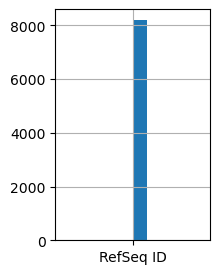

In [47]:
utrs_selected_seq_df.sequence_origin.hist(figsize=(2,3))

In [48]:
utrs_selected_seq_df.sequence.isna().sum()

0

In [49]:
groupby_refseq.size(), groupby_refseq['RefSeq ID'].nunique()

(RefSeq ID
 NM_000017    2
 NM_000019    3
 NM_000021    3
 NM_000023    6
 NM_000027    1
             ..
 NM_213646    2
 NM_213647    1
 NM_213649    3
 NM_213651    1
 NM_213662    2
 Length: 8372, dtype: int64,
 RefSeq ID
 NM_000017    1
 NM_000019    1
 NM_000021    1
 NM_000023    1
 NM_000027    1
             ..
 NM_213646    1
 NM_213647    1
 NM_213649    1
 NM_213651    1
 NM_213662    1
 Name: RefSeq ID, Length: 8372, dtype: int64)

In [50]:
missing_sequences = utrs_selected_seq_df[utrs_selected_seq_df.sequence.isna()]['RefSeq ID'].values

In [51]:
utrs_selected_seq_df[utrs_selected_seq_df['RefSeq ID'].isin(missing_sequences)].to_csv('missing_sequences.csv')

### Do sequences repeat?

(8288, 34)


1     8252
2       10
3        2
10       1
Name: count, dtype: int64

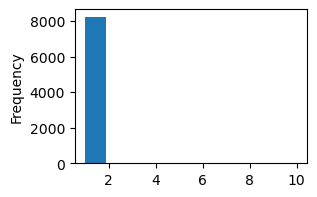

In [52]:
groupby_sequence = utrs_selected_seq_df.groupby('sequence')
print(utrs_selected_seq_df.shape)

groupby_sequence.size().plot(kind = "hist", figsize=(3,2))
groupby_sequence.size().value_counts()

In [53]:
utrs_selected_seq_df.to_pickle(OUT_UTR_DF_MIRNA_FC_PATH)